# Análise de texto de fontes desestruturadas e Web

## Exercícios da Aula 09

Este notebook servirá para relembrarmos **requests** e **BeautifulSoup**, que serão utilizadas para baixar notícias do site da **IstoÉ Dinheiro**. Em seguida, iremos extrair informações para construir um Pandas DataFrame de títulos e descrições para prática de **RegEx**.

## Importando as bibliotecas necessárias

In [1]:
# para nos comunicarmos com a Web
import requests
import urllib

# para extrair informações de páginas HTML
import bs4
from bs4 import BeautifulSoup

# Para criar um Data Frame
import pandas as pd

# Para expressões regulares
import re

# Para PDFs
import PyPDF2 as pp

# Recursos do sistema
import os

## Definindo cabeçalho User-Agent

In [2]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

## Definindo em qual página buscar

Vamos definir qual seção iremos utilizar para baixar as notícias.

In [3]:
secao = 'economia'
url = 'https://www.istoedinheiro.com.br/categoria/{}/'.format(secao)

## Utilizando *requests* para baixar a página de notícias

Com o uso da biblioteca **requests**, podemos obter o **HTML** da página da IstoÉ.

In [4]:
resposta = requests.get(url = url, headers=headers)

resposta.encoding = 'utf-8'

resposta.text

'<!DOCTYPE html>\n<html class="no-js" lang="pt-BR">\n<head>\n\t<meta charset="UTF-8" />\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\t<meta name="theme-color" content="#D00018">\n\t<link rel="profile" href="http://gmpg.org/xfn/11" />\n\t<link href="https://www.istoedinheiro.com.br/wp-content/themes/tema_dinheiro/assets/images/favicon_dinheiro_32X32-v21.ico" rel="shortcut icon" />\n  <meta name=\'dailymotion-domain-verification\' content=\'dm8ibc0sv94vdc6bk\' />\n\t<meta name=\'robots\' content=\'max-image-preview:large\' />\n\n\t<!-- This site is optimized with the Yoast SEO plugin v14.2 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<meta name="robots" content="index, follow" />\n\t<meta name="googlebot" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" />\n\t<meta name="bingbot" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-pre

## Extraindo informações relevantes com *BeautifulSoup*

Perceba que o HTML inclui uma grande quantidade de tags, o que dificulta identificar informações relevantes de forma direta. Com o auxílio da biblioteca **BeautifulSoup** podemos extrair facilmente as informações que desejamos.

In [5]:
soup = BeautifulSoup(resposta.text, 'html.parser')

Agora, vamos obter uma lista com todos os trechos HTML que contém uma notícia. Para identificar as tags corretas, é preciso ir até a página Web que desejamos extrair informações, dar botão direito e ir em **inspecionar elemento**, navegando pelo HTML até identificar as tags necessárias

Ex: https://www.istoedinheiro.com.br/categoria/economia/politica/

In [6]:
lista_tag_noticia = soup.find_all('article', class_='thumb')

Agora, podemos passar por cada uma das chamadas de notícias, extraindo informações de interesse, como o título, descrição e data.

In [7]:
lista_titulo = []
lista_desc = []
lista_data = []

for i in range(0, len(lista_tag_noticia)):
    
    tag_noticia = lista_tag_noticia[i]


    titulo = tag_noticia.find('h3').text
    titulo = titulo.replace('\n', '') #limpa os ENTERS a esquerda e direita
    lista_titulo.append(titulo)

    descricao = tag_noticia.find('p').text
    lista_desc.append(descricao)
    
    data_hora = tag_noticia.find('time', class_='c-data').text
    lista_data.append(data_hora)

## Criando um DataFrame

As informações que consideramos foram extraídas na repetição **for** e armazenadas em listas. Podemos utilizar estas listas para construir um Pandas DataFrame:

In [8]:
df = pd.DataFrame({'Secao': secao,
                   'Titulo': lista_titulo,
                   'Descrição': lista_desc,
                   'Data': lista_data
                  })
df

,Secao,Titulo,Descrição,Data
0,economia,Biden prometerá medidas para dissuadir ataques...,Por Steve Holland e David Brunnstrom WASHINGTO...,21/04/2023 21:07
1,economia,BCE/Guindos: núcleo da inflação também baixará...,O vice-presidente do Banco Central Europeu (BC...,21/04/2023 19:31
2,economia,Investigação sobre chefe da OEA atrai pressão ...,Por Matt Spetalnick WASHINGTON (Reuters) – A O...,21/04/2023 19:02
3,economia,"Para diretora do Fed, caminho da inflação de v...","Diretora do Federal Reserve (Fed, o banco cent...",21/04/2023 18:48
4,economia,S&P revisa perspectiva de ratings soberanos do...,A S&P Global Ratings revisou nesta sexta-feira...,21/04/2023 18:33
5,economia,"S&P reafirma rating ‘BBB/A-2’ da Itália, com p...","A S&P reafirmou nesta sexta-feira, 21, o ratin...",21/04/2023 18:25
6,economia,Biden assina decreto sobre “justiça ambiental”,Por Steve Holland WASHINGTON (Reuters) – O pre...,21/04/2023 17:58
7,economia,"Conflitos em Cartum não diminuem, após Exércit...",Por Khalid Abdelaziz e Nafisa Eltahir CARTUM (...,21/04/2023 17:26
8,economia,"Cepal prevê menor crescimento na AL e Caribe, ...",A Comissão Econômica para a América Latina e o...,21/04/2023 17:21
9,economia,"México capta US$ 2,9 bi no mercado internacion...","O México captou US$ 2,94 bilhões no mercado in...",21/04/2023 17:19


## Fazer o scraping de várias páginas

Ao navegar pelo site, percebemos que a **URL** das páginas segue o seguinte padrão: https://www.istoedinheiro.com.br/categoria/economia/page/2/

Vamos construir algumas funções auxiliares e fazer a extração dos dados das notícias de várias páginas:

In [9]:
def get_html_of_page(secao = 'economia', page_number=1):
    url = f'https://www.istoedinheiro.com.br/categoria/{secao}/page/{page_number}'
    headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
    resposta = requests.get(url = url, headers=headers)
    resposta.encoding = 'utf-8'
    return resposta.text

def get_data_of_page(secao = 'economia', page_number=1):
    html = get_html_of_page(secao=secao, page_number=page_number) 
    soup = BeautifulSoup(html, 'html.parser')
    lista_tag_noticia = soup.find_all('article', class_='thumb')

    lista_titulo = []
    lista_desc = []
    lista_data = []

    for i in range(0, len(lista_tag_noticia)):

        tag_noticia = lista_tag_noticia[i]

        titulo = tag_noticia.find('h3').text
        titulo = titulo.replace('\n', '') #limpa os ENTERS a esquerda e direita
        lista_titulo.append(titulo)

        descricao = tag_noticia.find('p').text
        lista_desc.append(descricao)

        data_hora = tag_noticia.find('time', class_='c-data').text
        lista_data.append(data_hora)

    return lista_titulo, lista_desc, lista_data

def get_dataframe_of_page(secao = 'economia', page_number=1):
    lista_titulo, lista_desc, lista_data = get_data_of_page(secao=secao, page_number=page_number)
    df = pd.DataFrame({'Secao': secao,
                       'Titulo': lista_titulo,
                       'Descrição': lista_desc,
                       'Data': lista_data
                      })
    return df

def get_news(secoes, n_pages=5):
    dfs = []
    for secao in secoes:
        for i in range(1, n_pages+1):
            dfs.append(get_dataframe_of_page(secao=secao, page_number=i))
    return pd.concat(dfs, axis=0)        

Vamos extrair dados de algumas seções, sendo das páginas 1..5 para cada seção.

In [10]:
df = get_news(['economia', 'negocios', 'mercado-digital'], n_pages=5)

E visualizar algumas notícias

In [11]:
df.sample(10)

,Secao,Titulo,Descrição,Data
5,economia,"S&P reafirma rating ‘BBB/A-2’ da Itália, com p...","A S&P reafirmou nesta sexta-feira, 21, o ratin...",21/04/2023 18:25
4,mercado-digital,Primeiro filme gravado no espaço estreia na Rú...,O primeiro filme de ficção gravado em órbita e...,20/04/2023 07:08
15,economia,Credit Suisse: investidores questionam cancela...,Detentores de bônus do Credit Suisse iniciaram...,21/04/2023 15:36
11,negocios,Banco Inter pede que funcionários evitem cabel...,"Telefone celular com capinha velha, acessórios...",20/04/2023 15:13
17,mercado-digital,Novas imagens da central nuclear de Fukushima ...,Novas imagens filmadas por um robô dentro de u...,05/04/2023 09:43
16,negocios,CNH Industrial anuncia que vai deixar Rússia,A CNH Industrial anunciou nesta quarta-feira (...,20/04/2023 09:08
10,mercado-digital,Twitter desenvolve projeto de IA apesar de ape...,Elon Musk está avançando em um projeto de inte...,12/04/2023 00:53
4,negocios,Associação de minoritários faz pedido à CVM so...,Por Rodrigo Viga Gaier RIO DE JANEIRO (Reuters...,20/04/2023 17:37
18,mercado-digital,Vírus via USB,O FBI (agência de segurança interna dos Estado...,14/04/2023 01:50
11,mercado-digital,"Legisladores de Montana, nos EUA, aprovam proi...","Legisladores do estado de Montana, no noroeste...",14/04/2023 20:20


### Salvando o DataFrame em CSV

É interessante armazenar o Dataframe em CSV para que ele possa ser análisado em algum momento posterior. Você poderia, por exemplo, extrair as notícias todos os dias de uma semana e analisar somente após ter todos estes dados.

In [12]:
df.to_csv('noticias_200423.csv', index=False)

## Relembrando - Extração de textos de PDFs

Vamos relembrar o que vimos na aula de extração de textos de PDFs e juntar com Expressões Regulares para procurarmos por padrões interessantes.

Primeiro, vamos fazer o download de uma página qualquer do diário oficial.

In [13]:
pdf_url="http://diariooficial.imprensaoficial.com.br/doflash/prototipo/2023/Abril/19/exec1/pdf/pg_0001.pdf"

response = urllib.request.urlopen(pdf_url)

Vamos salvar a resposta obtida em um arquivo PDF chamado `'pg_0001.pdf'`

In [14]:
arq = open('pg_0001.pdf', 'wb')
arq.write(response.read())
arq.close()

Então podemos utilizar a biblioteca `PyPDF2` para extrair os textos. Aqui, pense que nosso objetivo será apenas identificar **CPF**, **CNPJ**, datas, projetos de leis, etc. mencionados, não importanto tanto que o texto esteja em ordem.

In [15]:
pp_reader = pp.PdfReader(open('pg_0001.pdf', 'rb'))

texto = pp_reader.pages[0].extract_text()
print(texto)

 Casa Civil
 ASSESSORIA TÉCNICA DO GOVERNO
 Despacho da Assessora Chefe, de 18-4-2023
No Reqs. de 10-4-2023 (CC-260.380 + CC-262.018 ambos 
de 2023), sobre vista dos autos: “Fica deferida vista do processo em referência ao interessado Deoadato Rodrigues Leite, OAB/SP-126.092, por 10 dias, no interior do Palácio do Governo, 
Av. Morumbi, 4.500, Centro de Protocolo e Expedição, sala 23, 
térreo, nos termos da LF 8.906-94, art. 7º, inc. XIII, alterada pela LF 14.365-2022, facultada a extração de cópias reprográficas 
das peças indicadas mediante o recolhimento das respectivas 
taxas ou a retirada dos autos pelo prazo de 7 dias, conforme a Lei 10.177-98, art. 32, VI, e Lei federal 8.906, art. 7º, inc. XV.”
 Governo e Relações 
Institucionais
 CASA MILITAR
 COORDENADORIA ESTADUAL DE PROTEÇÃO E 
DEFESA CIVIL
Despacho do Coordenador, de 18-4-2023
Transferência de recursos financeiros como segue abaixo:Processo CMIL 165.458-2023 - Município de TAMBAÚ – 
Termo de Convênio CMil-17-630-2023 – Con

### Capturando CPFs

Vamos procurar por todos os CPFs mencionados nesta página:

In [16]:
re.findall(r'\d{3}\.\d{3}\.\d{3}-\d{2}', texto)

['034.365.208-02', '272.370.278-24']

E procurar por todas as datas

In [17]:
re.findall(r'\b\d{1,2}/\d{1,2}/\d{2,4}\b', texto)

['17/04/2023',
 '29/04/15',
 '18/04/2023',
 '29/04/15',
 '18/04/2023',
 '29/04/15',
 '18/04/2023',
 '12/11/2015',
 '26/03/2023',
 '25/09/2025',
 '18/04/2023',
 '12/11/2015',
 '16/03/2023',
 '16/09/2025',
 '18/04/2023',
 '27/05/2022',
 '18/04/2023',
 '16/03/2023',
 '15/06/2024',
 '16/03/2023',
 '12/11/2015',
 '14/04/2023',
 '13/10/2025',
 '14/04/2023',
 '18/04/2023',
 '12/09/2008']

**Pergunta**: Qual a utilidade do `\b` no regex acima?

<div class="alert alert-success">

O `\b` indica que a correspondência deve ocorrer apenas em palavras que começam e terminam com caracteres não alfanuméricos, como espaços em branco, vírgulas, ponto final, entre outros. Isso evita que a expressão regular correspondida em datas que estão no meio de outras palavras, por exemplo.

</div>

# Exercícios

Considere a base de notícias recém extraída para os exercícios.

**Exercício 1)** Utilize RegEx para criar uma nova coluna no DataFrame. Esta nova coluna deve indicar se o título da notícia tem faz ou não menção ao **governo**.

Aqui, você vai ter que pensar em um RegEx que busque por termos que façam sentido e generalizem a noção de **"governo"**.

In [18]:
df

,Secao,Titulo,Descrição,Data
0,economia,Biden prometerá medidas para dissuadir ataques...,Por Steve Holland e David Brunnstrom WASHINGTO...,21/04/2023 21:07
1,economia,BCE/Guindos: núcleo da inflação também baixará...,O vice-presidente do Banco Central Europeu (BC...,21/04/2023 19:31
2,economia,Investigação sobre chefe da OEA atrai pressão ...,Por Matt Spetalnick WASHINGTON (Reuters) – A O...,21/04/2023 19:02
3,economia,"Para diretora do Fed, caminho da inflação de v...","Diretora do Federal Reserve (Fed, o banco cent...",21/04/2023 18:48
4,economia,S&P revisa perspectiva de ratings soberanos do...,A S&P Global Ratings revisou nesta sexta-feira...,21/04/2023 18:33
...,...,...,...,...
15,mercado-digital,"Tiranossauros rex tinham lábios, diz estudo",“Jurassic Park” e os fabricantes de brinquedos...,30/03/2023 20:08
16,mercado-digital,Gravuras pré-históricas da mesma época das pin...,"Um grupo de arqueólogos anunciou, nesta quinta...",30/03/2023 18:13
17,mercado-digital,Carta de Musk e cientistas sobre pausa na IA g...,A carta pública assinada pelo magnata Elon Mus...,30/03/2023 12:52
18,mercado-digital,"Parem de olhar para a tela do celular, pede in...",O problema com os telefones móveis é que as pe...,30/03/2023 12:14


In [19]:
regex_governo = r'\b(governo|presidente|presidência|ministério|secretaria)\b'
df['mencao_governo'] = df['Titulo'].apply(lambda x: bool(re.search(regex_governo, x, flags=re.IGNORECASE)))

In [20]:
df.loc[df.mencao_governo == True, :]

,Secao,Titulo,Descrição,Data,mencao_governo
17,economia,Ex-presidente do Peru Toledo se rende às autor...,(Reuters) – O ex-presidente peruano Alejandro ...,21/04/2023 15:08,True
1,economia,Twitter retira rótulo de “financiado pelo gove...,(Reuters) – O Twitter retirou os rótulos de “f...,21/04/2023 13:53,True
13,economia,BC defende uso da TR para corrigir FGTS; gover...,"O procurador Erasto Villaverde Carvalho Filho,...",20/04/2023 17:34,True
8,economia,Haddad sobre e-commerce: governo seguirá paíse...,"O ministro da Fazenda, Fernando Haddad, afirmo...",20/04/2023 13:38,True
13,economia,Presidente de Uganda consulta parlamentares so...,"KAMPALA (Reuters) – O presidente de Uganda, Yo...",20/04/2023 12:48,True
17,economia,Advogados do ex-presidente peruano Toledo tent...,WASHINGTON (Reuters) – Advogados do ex-preside...,20/04/2023 12:32,True
17,negocios,Governo simplifica sistema de pagamentos em mo...,SÃO PAULO (Reuters) – Por Fabrício de Castro S...,20/04/2023 19:26,True
1,negocios,Haddad sobre e-commerce: governo seguirá paíse...,"O ministro da Fazenda, Fernando Haddad, afirmo...",20/04/2023 13:38,True
10,negocios,Governo alemão aumentará levemente a previsão ...,"Por Holger Hansen BERLIM, 20 Abr (Reuters) – O...",20/04/2023 12:37,True
18,negocios,Governo deve anunciar em algumas semanas medid...,SÃO PAULO (Reuters) – O governo deve convocar ...,20/04/2023 12:15,True


**Exercício 2)** Repita o exercício anterior, buscando por termos que façam menção à **bolsas de valores**.

In [21]:
regex_bolsa = r'\b(bolsa de valores|bolsa|investimento|dólar|inflação)\b'
df['mencao_bolsa'] = df['Titulo'].apply(lambda x: bool(re.search(regex_bolsa, x, flags=re.IGNORECASE)))

In [22]:
df.loc[df.mencao_bolsa == True, :]

,Secao,Titulo,Descrição,Data,mencao_governo,mencao_bolsa
1,economia,BCE/Guindos: núcleo da inflação também baixará...,O vice-presidente do Banco Central Europeu (BC...,21/04/2023 19:31,False,True
3,economia,"Para diretora do Fed, caminho da inflação de v...","Diretora do Federal Reserve (Fed, o banco cent...",21/04/2023 18:48,False,True
19,economia,Campos Neto reforça ocorrência de inflação de ...,"O presidente do Banco Central (BC), Roberto Ca...",21/04/2023 09:32,False,True
6,economia,Argentina: BC aumenta juros básicos em 300 pon...,O Banco Central da Argentina (BCRA) confirmou ...,20/04/2023 18:10,False,True
1,economia,Banco Inter pede que funcionários evitem cabel...,"Telefone celular com capinha velha, acessórios...",20/04/2023 15:13,False,True
19,negocios,Shein anuncia investimento de R$750 mi prevend...,A marca de fast fashion Shein anunciou nesta q...,20/04/2023 18:34,False,True
5,negocios,Dólar à vista cai ante real com realização de ...,"Por Fabrício de Castro SÃO PAULO, 20 Abr (Reut...",20/04/2023 17:34,False,True
11,negocios,Banco Inter pede que funcionários evitem cabel...,"Telefone celular com capinha velha, acessórios...",20/04/2023 15:13,False,True
14,negocios,"Dólar recua após salto da véspera, mas segue a...",Por Luana Maria Benedito SÃO PAULO (Reuters) –...,20/04/2023 09:30,False,True


**Exercício 3)** Repita o exercício anterior, buscando por termos que façam menção à **bolsas de valores** ou ao **governo** na **descrição** das notícias.

In [23]:
regex_governo = r'\b(governo|presidente|presidência|ministério|secretaria)\b'
df['mencao_governo_desc'] = df['Descrição'].apply(lambda x: bool(re.search(regex_governo, x, flags=re.IGNORECASE)))

In [24]:
regex_bolsa = r'\b(bolsa de valores|bolsa|investimento|dólar|inflação)\b'
df['mencao_bolsa_desc'] = df['Descrição'].apply(lambda x: bool(re.search(regex_bolsa, x, flags=re.IGNORECASE)))

In [25]:
df.loc[(df.mencao_bolsa_desc == True) | (df.mencao_governo_desc == True), :]

,Secao,Titulo,Descrição,Data,mencao_governo,mencao_bolsa,mencao_governo_desc,mencao_bolsa_desc
0,economia,Biden prometerá medidas para dissuadir ataques...,Por Steve Holland e David Brunnstrom WASHINGTO...,21/04/2023 21:07,False,False,True,False
1,economia,BCE/Guindos: núcleo da inflação também baixará...,O vice-presidente do Banco Central Europeu (BC...,21/04/2023 19:31,False,True,True,True
3,economia,"Para diretora do Fed, caminho da inflação de v...","Diretora do Federal Reserve (Fed, o banco cent...",21/04/2023 18:48,False,True,False,True
6,economia,Biden assina decreto sobre “justiça ambiental”,Por Steve Holland WASHINGTON (Reuters) – O pre...,21/04/2023 17:58,False,False,True,False
14,economia,Reino Unido quer mudar lei para acelerar depor...,Por David Milliken LONDRES (Reuters) – O gover...,21/04/2023 15:41,False,False,True,False
...,...,...,...,...,...,...,...,...
14,mercado-digital,China quer mais IA na pesquisa,A China deu início à implementação de um ambic...,14/04/2023 02:15,False,False,True,False
4,mercado-digital,Governo dos EUA contestará restrições à pílula...,O Departamento de Justiça dos Estados Unidos a...,13/04/2023 12:38,True,False,True,False
16,mercado-digital,China exigirá ‘avaliação de segurança’ de prod...,O governo da China pretende impor uma “inspeçã...,11/04/2023 06:07,False,False,True,False
9,mercado-digital,Austrália entra na onda e bane o TikTok,A Austrália anunciou uma proibição do uso do T...,06/04/2023 00:40,False,False,True,False


**Exercício 4)** Utilizando as variáveis novas criadas com RegEx:


**a)** Conte quantas notícias fazem menção ao Governo. Conte para o título e também descrição.

In [26]:
count_mencao_governo_titulo = df.loc[df.mencao_governo == True, :].shape[0]
count_mencao_governo_titulo

16

In [27]:
count_mencao_governo_desc = df.loc[df.mencao_governo_desc == True, :].shape[0]
count_mencao_governo_desc

62

In [28]:
count_mencao_bolsa_titulo = df.loc[df.mencao_bolsa == True, :].shape[0]
count_mencao_bolsa_titulo

9

In [29]:
count_mencao_bolsa_desc = df.loc[df.mencao_bolsa_desc == True, :].shape[0]
count_mencao_bolsa_desc

18

**b)** Gere um gráfico de barras das frequências absolutas (contagem)

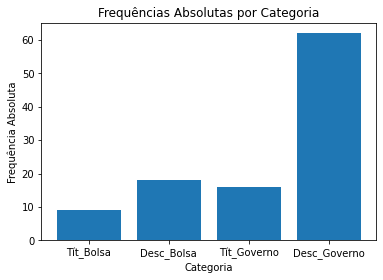

In [30]:
import matplotlib.pyplot as plt

# lista de categorias
categorias = ['Tít_Bolsa', 'Desc_Bolsa', 'Tít_Governo', 'Desc_Governo',]
# contar frequências absolutas
frequencias_absolutas = [count_mencao_bolsa_titulo, count_mencao_bolsa_desc, count_mencao_governo_titulo, count_mencao_governo_desc]

# plotar gráfico de barras
plt.bar(categorias, frequencias_absolutas)

# adicionar título e rótulos nos eixos
plt.title('Frequências Absolutas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Frequência Absoluta')

# exibir gráfico
plt.show()

**c)** E se quisermos a frequência relativa (porcentagem)

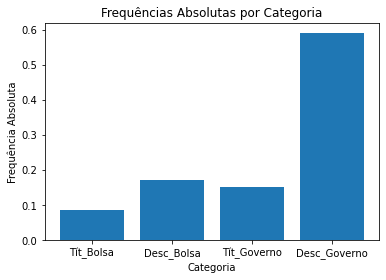

In [31]:
# lista de categorias
categorias = ['Tít_Bolsa', 'Desc_Bolsa', 'Tít_Governo', 'Desc_Governo',]
# contar frequências absolutas
frequencias_absolutas = [count_mencao_bolsa_titulo, count_mencao_bolsa_desc, count_mencao_governo_titulo, count_mencao_governo_desc]

# plotar gráfico de barras
plt.bar(categorias, [f / sum(frequencias_absolutas) for f in frequencias_absolutas])

# adicionar título e rótulos nos eixos
plt.title('Frequências Absolutas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Frequência Absoluta')

# exibir gráfico
plt.show()

**Exercício 5)** Calcule a frequência de menções à Pandemia por seção (política, economia, finanças). Obs: Considere a descrição da notícia. Gere um gráfico de barras dos resultados.

In [32]:
regex_pandemia = r'\b(pandemia|covid|COVID-19|vírus|mortes)\b'
df['mencao_pandemia'] = df['Descrição'].apply(lambda x: bool(re.search(regex_pandemia, x, flags=re.IGNORECASE)))

In [39]:
df_analis_secao = df.groupby(['Secao']).sum()

In [43]:
df_analis_secao

,mencao_governo,mencao_bolsa,mencao_governo_desc,mencao_bolsa_desc,mencao_pandemia
Secao,,,,,
economia,6,5,37,9,0
mercado-digital,5,0,6,0,6
negocios,5,4,19,9,1


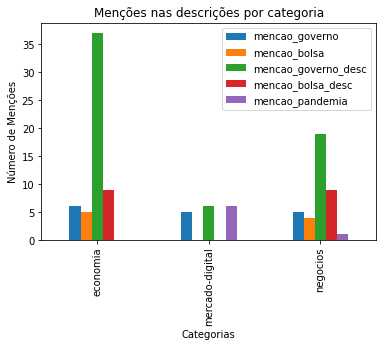

In [45]:
# Crie o gráfico de barras
df_analis_secao.plot(kind='bar')

# Adicione o título e as etiquetas do eixo x e y
plt.title('Menções nas descrições por categoria')
plt.xlabel('Categorias')
plt.ylabel('Número de Menções')

# Exiba o gráfico
plt.show()

**Exercício 6)** Crie um código python que consiga fazer o download de várias páginas do diário oficial.

Salve em arquivos nomeados no padrão `'pg_0001.pdf'`, `'pg_0002.pdf'`, ... , `'pg_000n.pdf'`

In [75]:
def pages_diario(n):    
    for i in range(1, n+1):
        pdf_url = f"http://diariooficial.imprensaoficial.com.br/doflash/prototipo/2023/Abril/19/exec1/pdf/pg_{str(i).zfill(4)}.pdf"
        response = urllib.request.urlopen(pdf_url)
        arq = open(f'pg_{str(i).zfill(4)}.pdf', 'wb')
        arq.write(response.read())
        arq.close()

In [86]:
pages_diario(7)

**Exercício 7)** Crie um código python que leia `n` arquivos **PDF**s de uma pasta e extraia seus textos utilizando a biblioteca vista no exemplo da aula.

Aqui, cada **PDF** é uma página do diário oficial. Suponha que os arquivos estão nomeados no padrão `'pg_0001.pdf'`, `'pg_0002.pdf'`, ... , `'pg_000n.pdf'`.

Retorne uma lista onde cada item da lista é uma string contendo o texto da página em questão. Exemplo:

```python
[
    'texto da página 01 do diário`,
    'texto da página 02 do diário`,
    'texto da página 03 do diário`,
    'texto da página 04 do diário`,
]
```

In [92]:
def scrap_text_diario(pasta):
    textos = [] # Cria uma lista vazia para armazenar os textos de cada página

    for nome_arquivo in os.listdir(pasta): # Itera sobre todos os arquivos na pasta
        if nome_arquivo.endswith(".pdf"): # Verifica se o arquivo é um PDF
            caminho_arquivo = os.path.join(pasta, nome_arquivo) # Cria o caminho completo para o arquivo
            with open(caminho_arquivo, "rb") as arquivo_pdf: # Abre o arquivo PDF em modo de leitura binária
                leitor = PyPDF2.PdfReader(arquivo_pdf) # Cria um objeto de leitura do PDF
                for num_pagina in range(len(leitor.pages)): # Itera sobre todas as páginas do PDF
                    pagina = leitor.pages[num_pagina] # Extrai a página atual
                    texto = pagina.extract_text() # Extrai o texto da página atual
                    textos.append(texto) # Adiciona o texto à lista de textos

    return textos

pasta = "./" 
textos_pdfs = scrap_text_diario(pasta)

**Exercício 8)** Crie um código python que recebe a lista do exercício anterior. Exemplo:

```python
[
    'texto da página 01 do diário`,
    'texto da página 02 do diário`,
    'texto da página 03 do diário`,
    'texto da página 04 do diário`,
]
```

Você deve procurar todos os **CPF**s ou **CNPJ**s contidos no diário. Indique a página onde o mesmo foi encontrado. Exemplo de resposta:
```python
[
    ['123.456.789-00', 0],
    ['87.340.538/0001-23', 0]
    ['555.666.777-00', 1],
    ['30.375.316/0001-29', 3],
    ['30.375.316/0001-29', 3],
]
```

In [104]:
for i in range(len(textos_pdfs)):
    print(re.findall(r'\d{3}\.\d{3}\.\d{3}-\d{2}', textos_pdfs[i]))

['034.365.208-02', '272.370.278-24']
[]
['084.722.928-94']
[]
[]
['349.061.608-16', '224.319.288-88', '298.159.898-80', '349.061.608-16', '349.061.608-16', '224.319.288-88', '298.159.898-80', '349.061.608-16', '349.061.608-16']
[]


**Exercício 9)** Um empresário deseja saber quais páginas do diário oficial fazem menção a determinado assunto.

Faça um programa em python que recebe os textos das páginas do diário oficial:


```python
[
    'texto da página 01 do diário`,
    'texto da página 02 do diário`,
    'texto da página 03 do diário`,
    'texto da página 04 do diário`,
]
```

Crie um padrão de expressão regular para busca por termos/palavras (simule um cenário) e retorne uma lista das páginas que fazem menção ao padrão. Exemplo de resposta:


```python
[0, 2, 3]
```

In [105]:
def buscar_paginas_com_padrao(textos, padrao):
    paginas_com_padrao = []
    for i, texto in enumerate(textos):
        if re.search(padrao, texto, re.IGNORECASE):
            paginas_com_padrao.append(i)
    return paginas_com_padrao

In [106]:
padrao = r'\b(governo|presidente|presidência|ministério|secretaria)\b'
buscar_paginas_com_padrao(textos_pdfs, padrao)

[0, 1, 3, 6]